In [1]:
# Import things
%matplotlib inline
import matplotlib
#matplotlib.use('Agg')

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import os
import glob
from scipy import io

import sys
sys.path.append('/Users/heather/ICECAPS-ACE/DataParse/')

from ace_parse import *
from utils import * 

# Supress warnings for sake of log file
import warnings
warnings.filterwarnings("ignore")

# Plotting preferences

rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 14}) 
rcParams['axes.titlepad'] = 14 
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
myFmt = md.DateFormatter('%H/%d')
rule = md.HourLocator(interval=12)

In [2]:
# Can compare v2 with NoAA met (close in elevation.)

In [4]:


def get_ventus(start,stop,d_loc,name):
    f_date_list = pd.date_range(start.date(),stop.date(),freq='1D')
    out = pd.DataFrame(columns=['date','wsd','wdir','T','Checksum','status'])
    for date in f_date_list:
        f = d_loc + r'%s_%s'%(name,str(date.date()))
        try:
            data = pd.read_csv(f,parse_dates=[0],index_col=[0])
        except:
            print('No data for %s'%str(date.date()))
            continue

        out = out.append(data,sort=True)    
    
    # Get rid of any duplicates
    out = out[~out.index.duplicated()]   
    # Crop to datetime
    out=out[start:stop]
    
    # Resample to one minutely
    out = out.resample(rule = '1min', how='mean')
    
    # Fill any missing minutes with nans
    new_index = pd.date_range(out.index[0],out.index[-1] , freq='min')
    out = out.reindex(new_index)
    
    return out

In [5]:
# Get v2
d_loc = '/Volumes/Data/ICECAPSarchive/fluxtower/processed/ventus/'
name='v2'
start = dt.datetime(2019,8,1,0,0)
stop = dt.datetime(2019,8,31,23,59,0)

v2 = get_ventus(start,stop,d_loc,name)


No data for 2019-08-10


In [29]:
v1 = get_ventus(start,stop,d_loc,'v1')

No data for 2019-08-10


In [6]:
# Get met data

dloc = '/Volumes/Data/ICECAPSarchive/Summit_Met/'
years = ['2019']
months = ['08']

met=pd.DataFrame()

for year in years:
    for month in months:
        w_dloc = '/Volumes/Data/ICECAPSarchive/Summit_Met/met_sum_insitu_1_obop_minute_%s_%s.txt'%(year,month)
        met = met.append(get_NOAA_met(w_dloc))



In [8]:
met['wd']

2019-08-01 00:00:00    163.0
2019-08-01 00:01:00    162.0
2019-08-01 00:02:00    161.0
2019-08-01 00:03:00    161.0
2019-08-01 00:04:00    162.0
                       ...  
2019-08-31 23:55:00     69.0
2019-08-31 23:56:00     68.0
2019-08-31 23:57:00     69.0
2019-08-31 23:58:00     69.0
2019-08-31 23:59:00     70.0
Freq: T, Name: wd, Length: 44640, dtype: float64

In [10]:
v2['wdir']

2019-08-01 00:00:00    180.666667
2019-08-01 00:01:00    179.766667
2019-08-01 00:02:00    180.166667
2019-08-01 00:03:00    181.183333
2019-08-01 00:04:00    181.533333
                          ...    
2019-08-31 23:55:00     83.881356
2019-08-31 23:56:00     84.383333
2019-08-31 23:57:00     84.366667
2019-08-31 23:58:00     85.400000
2019-08-31 23:59:00     89.000000
Freq: T, Name: wdir, Length: 44640, dtype: float64

In [34]:
v1['wdir']

2019-08-01 00:00:00    185.300000
2019-08-01 00:01:00    184.916667
2019-08-01 00:02:00    183.833333
2019-08-01 00:03:00    185.983333
2019-08-01 00:04:00    187.833333
                          ...    
2019-08-31 23:55:00     85.300000
2019-08-31 23:56:00     86.216667
2019-08-31 23:57:00     85.733333
2019-08-31 23:58:00     86.366667
2019-08-31 23:59:00     83.000000
Freq: T, Name: wdir, Length: 44640, dtype: float64

In [35]:
diff_v2 = v2['wdir'] - met['wd']
diff_v1 = v1['wdir'] - met['wd']

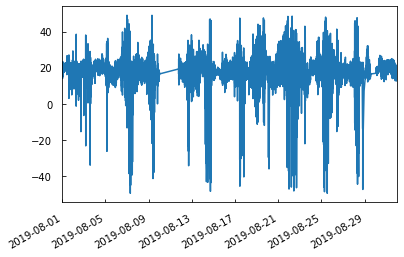

In [36]:
diff_v2[np.abs(diff_v2)<50].plot()

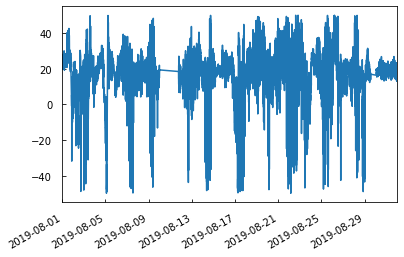

In [37]:
diff_v1[np.abs(diff_v1)<50].plot()

In [38]:
diff_v2.median()

18.06666666666667

In [39]:
diff_v1.median()

18.08333333333333

In [43]:
((v1['wdir']-18.07) - met['wd']).median()

0.013333333333321207